In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df=pd.read_csv('https://raw.githubusercontent.com/RubixML/Credit/master/dataset.csv')
df.head()

,credit_limit,gender,education,marital_status,age,timeliness_1,timeliness_2,timeliness_3,timeliness_4,timeliness_5,...,balance_6,payment_1,payment_2,payment_3,payment_4,payment_5,payment_6,avg_balance,avg_payment,default
0,20000,female,uni,married,24,m+2,m+2,m-1,m-1,m-2,...,0,0,689,0,0,0,0,1284.000000,114.833333,yes
1,120000,female,uni,single,26,m-1,m+2,m+0,m+0,m+0,...,3261,0,1000,1000,1000,0,2000,2846.166667,833.333333,yes
2,90000,female,uni,single,34,m+0,m+0,m+0,m+0,m+0,...,15549,1518,1500,1000,1000,1000,5000,16942.166667,1836.333333,no
3,50000,female,uni,married,37,m+0,m+0,m+0,m+0,m+0,...,29547,2000,2019,1200,1100,1069,1000,38555.666667,1398.000000,no
4,50000,male,uni,married,57,m-1,m+0,m-1,m+0,m+0,...,19131,2000,36681,10000,9000,689,679,18223.166667,9841.500000,no


In [33]:
# Attribute Information:

# This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature
# and used the following 23 variables as explanatory variables: 
# X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
# X2: Gender (1 = male; 0 = female). 
# X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
# X4: Marital status (1 = married; 2 = single; 3 = others). 
# X5: Age (year). 
# X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment
      # status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for
      # the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months;
      # 9 = payment delay for nine months and above. 
# X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005;
          #  . . .; X17 = amount of bill statement in April, 2005. 
# X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;
          #  X23 = amount paid in April, 2005. 

In [34]:
df.shape

(30000, 26)

In [35]:
cat_cols = df.select_dtypes(include = 'object')
num_cols = df.select_dtypes(include = np.number)
print('Continuous variables are : ',num_cols.columns)
print('Categorical Columns are : ',cat_cols.columns)

Continuous variables are :  Index(['credit_limit', 'age', 'balance_1', 'balance_2', 'balance_3',
       'balance_4', 'balance_5', 'balance_6', 'payment_1', 'payment_2',
       'payment_3', 'payment_4', 'payment_5', 'payment_6', 'avg_balance',
       'avg_payment'],
      dtype='object')
Categorical Columns are :  Index(['gender', 'education', 'marital_status', 'timeliness_1', 'timeliness_2',
       'timeliness_3', 'timeliness_4', 'timeliness_5', 'timeliness_6',
       'default'],
      dtype='object')


In [36]:
df.describe()

,credit_limit,age,balance_1,balance_2,balance_3,balance_4,balance_5,balance_6,payment_1,payment_2,payment_3,payment_4,payment_5,payment_6,avg_balance,avg_payment
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,44976.945200,5275.232094
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,63260.721860,10137.946323
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,-56043.166667,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,4781.333333,1113.291667
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,21051.833333,2397.166667
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,57104.416667,5583.916667
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,877313.833333,627344.333333


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   credit_limit    30000 non-null  int64  
 1   gender          30000 non-null  object 
 2   education       30000 non-null  object 
 3   marital_status  30000 non-null  object 
 4   age             30000 non-null  int64  
 5   timeliness_1    30000 non-null  object 
 6   timeliness_2    30000 non-null  object 
 7   timeliness_3    30000 non-null  object 
 8   timeliness_4    30000 non-null  object 
 9   timeliness_5    30000 non-null  object 
 10  timeliness_6    30000 non-null  object 
 11  balance_1       30000 non-null  int64  
 12  balance_2       30000 non-null  int64  
 13  balance_3       30000 non-null  int64  
 14  balance_4       30000 non-null  int64  
 15  balance_5       30000 non-null  int64  
 16  balance_6       30000 non-null  int64  
 17  payment_1       30000 non-null 

In [38]:
print('% Values in each categorical columns')
for i in cat_cols.columns:
    print('\n% Values in column ',i)
    print((df[i].value_counts()/len(df[i])*100))

% Values in each categorical columns

% Values in column  gender
female    60.373333
male      39.626667
Name: gender, dtype: float64

% Values in column  education
uni       46.766667
grad      35.283333
hs        16.390000
other2     0.933333
other1     0.410000
other3     0.170000
0          0.046667
Name: education, dtype: float64

% Values in column  marital_status
single     53.213333
married    45.530000
other       1.076667
na          0.180000
Name: marital_status, dtype: float64

% Values in column  timeliness_1
m+0    49.123333
m-1    18.953333
m+1    12.293333
m-2     9.196667
m+2     8.890000
m+3     1.073333
m+4     0.253333
m+5     0.086667
m+8     0.063333
m+6     0.036667
m+7     0.030000
Name: timeliness_1, dtype: float64

% Values in column  timeliness_2
m+0    52.433333
m-1    20.166667
m+2    13.090000
m-2    12.606667
m+3     1.086667
m+4     0.330000
m+1     0.093333
m+5     0.083333
m+7     0.066667
m+6     0.040000
m+8     0.003333
Name: timeliness_2, dtype: fl

In [39]:
# Checking for defects in the data such as missing values
df.isnull().sum()

credit_limit      0
gender            0
education         0
marital_status    0
age               0
timeliness_1      0
timeliness_2      0
timeliness_3      0
timeliness_4      0
timeliness_5      0
timeliness_6      0
balance_1         0
balance_2         0
balance_3         0
balance_4         0
balance_5         0
balance_6         0
payment_1         0
payment_2         0
payment_3         0
payment_4         0
payment_5         0
payment_6         0
avg_balance       0
avg_payment       0
default           0
dtype: int64

Text(0.5, 1.0, 'Probability Of Defaulting Payment Next Month')

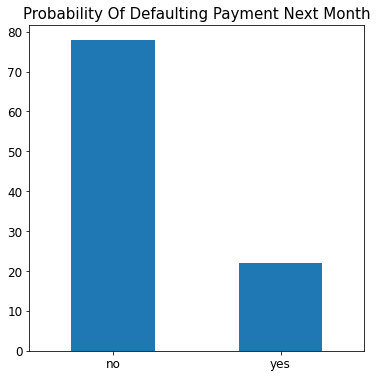

In [40]:
# Visualisation of Target feature
def_cnt = (df.default.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)

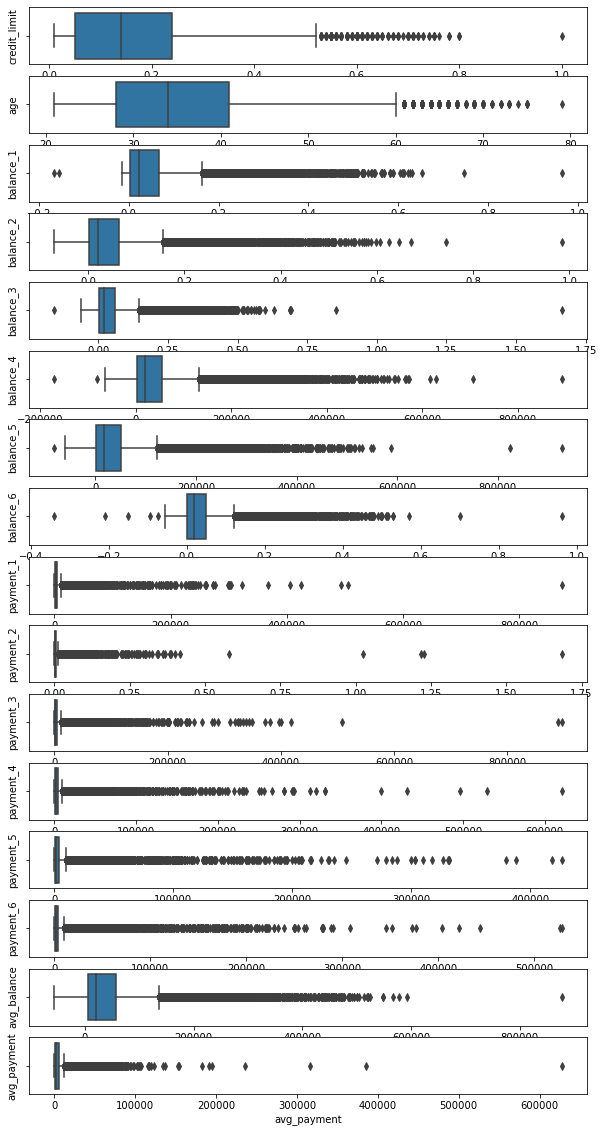

In [41]:
# Checking the outliers
plt.figure(figsize=(10,20))
for i,col in enumerate(num_cols,1):
    plt.subplot(16,1,i)
    sns.boxplot(df[col])
    plt.ylabel(col)
plt.show()

In [42]:
# Checking the missing values
missing_value=["na"]
df=pd.read_csv('https://raw.githubusercontent.com/RubixML/Credit/master/dataset.csv',na_values=missing_value)

In [43]:
df['marital_status']=df['marital_status'].replace('na',np.nan)

In [44]:
df.isnull().sum()/len(df)

credit_limit      0.0000
gender            0.0000
education         0.0000
marital_status    0.0018
age               0.0000
timeliness_1      0.0000
timeliness_2      0.0000
timeliness_3      0.0000
timeliness_4      0.0000
timeliness_5      0.0000
timeliness_6      0.0000
balance_1         0.0000
balance_2         0.0000
balance_3         0.0000
balance_4         0.0000
balance_5         0.0000
balance_6         0.0000
payment_1         0.0000
payment_2         0.0000
payment_3         0.0000
payment_4         0.0000
payment_5         0.0000
payment_6         0.0000
avg_balance       0.0000
avg_payment       0.0000
default           0.0000
dtype: float64

In [45]:
# Creating a copy of dataset
df1= df.copy(deep=True)

single     15964
married    13659
other        323
Name: marital_status, dtype: int64

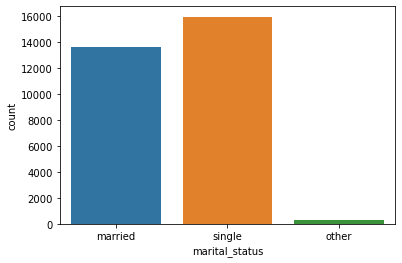

In [46]:
# Checking the distribution of marital status
sns.countplot(df1['marital_status'])
df1['marital_status'].value_counts()

In [47]:
# sns.scatterplot(x=df['age'],y=df['marital_status'])
df1['marital_status']= df1['marital_status'].fillna(df1['marital_status'].mode()[0])

In [48]:
df1['marital_status'].isnull().sum()
# df1['marital_status'].unique()

0

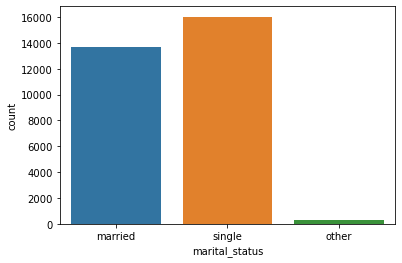

In [49]:
sns.countplot(df1['marital_status'])

In [50]:
df1['marital_status'].value_counts()

single     16018
married    13659
other        323
Name: marital_status, dtype: int64

In [51]:
df1['education'].replace(to_replace =["other1", "other2", "other3", "0"], value = "others", inplace=True)
df1['education'].value_counts()

uni       14030
grad      10585
hs         4917
others      468
Name: education, dtype: int64

In [52]:
df1.shape

(30000, 26)

In [53]:
from sklearn.preprocessing import OrdinalEncoder
df1['education']=OrdinalEncoder(categories=[['others','hs','grad','uni']]).fit_transform(df1['education'].values.reshape(-1,1))

In [54]:
df1['education']=df1['education'].astype(int)

In [55]:
df1['education'].value_counts()

3    14030
2    10585
1     4917
0      468
Name: education, dtype: int64

In [56]:
df1['marital_status']=df1['marital_status'].replace({0:3})
df1['marital_status'].value_counts(normalize=True)

single     0.533933
married    0.455300
other      0.010767
Name: marital_status, dtype: float64

In [57]:
# Checking for timeliness variables
df1['timeliness_1'].value_counts()

m+0    14737
m-1     5686
m+1     3688
m-2     2759
m+2     2667
m+3      322
m+4       76
m+5       26
m+8       19
m+6       11
m+7        9
Name: timeliness_1, dtype: int64

In [58]:
#replacing the prefix from timeline feature
df1.replace(['m+8', 'm+7', 'm+6', 'm+5', 'm+4', 'm+3', 'm+2', 'm+1', 'm+0', 'm-1', 'm-2'],['8', '7', '6', '5', '4', '3', '2', '1', '0', '-1', '-2'], inplace=True)

In [59]:
df1.head()

,credit_limit,gender,education,marital_status,age,timeliness_1,timeliness_2,timeliness_3,timeliness_4,timeliness_5,...,balance_6,payment_1,payment_2,payment_3,payment_4,payment_5,payment_6,avg_balance,avg_payment,default
0,20000,female,3,married,24,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,1284.000000,114.833333,yes
1,120000,female,3,single,26,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,2846.166667,833.333333,yes
2,90000,female,3,single,34,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,16942.166667,1836.333333,no
3,50000,female,3,married,37,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,38555.666667,1398.000000,no
4,50000,male,3,married,57,-1,0,-1,0,0,...,19131,2000,36681,10000,9000,689,679,18223.166667,9841.500000,no


In [60]:
cat_cols1 = df1.select_dtypes(include = 'object')
num_cols1 = df1.select_dtypes(include = np.number)
print('Continuous variables are : ',num_cols1.columns)
print('Categorical Columns are : ',cat_cols1.columns)

Continuous variables are :  Index(['credit_limit', 'education', 'age', 'balance_1', 'balance_2',
       'balance_3', 'balance_4', 'balance_5', 'balance_6', 'payment_1',
       'payment_2', 'payment_3', 'payment_4', 'payment_5', 'payment_6',
       'avg_balance', 'avg_payment'],
      dtype='object')
Categorical Columns are :  Index(['gender', 'marital_status', 'timeliness_1', 'timeliness_2',
       'timeliness_3', 'timeliness_4', 'timeliness_5', 'timeliness_6',
       'default'],
      dtype='object')


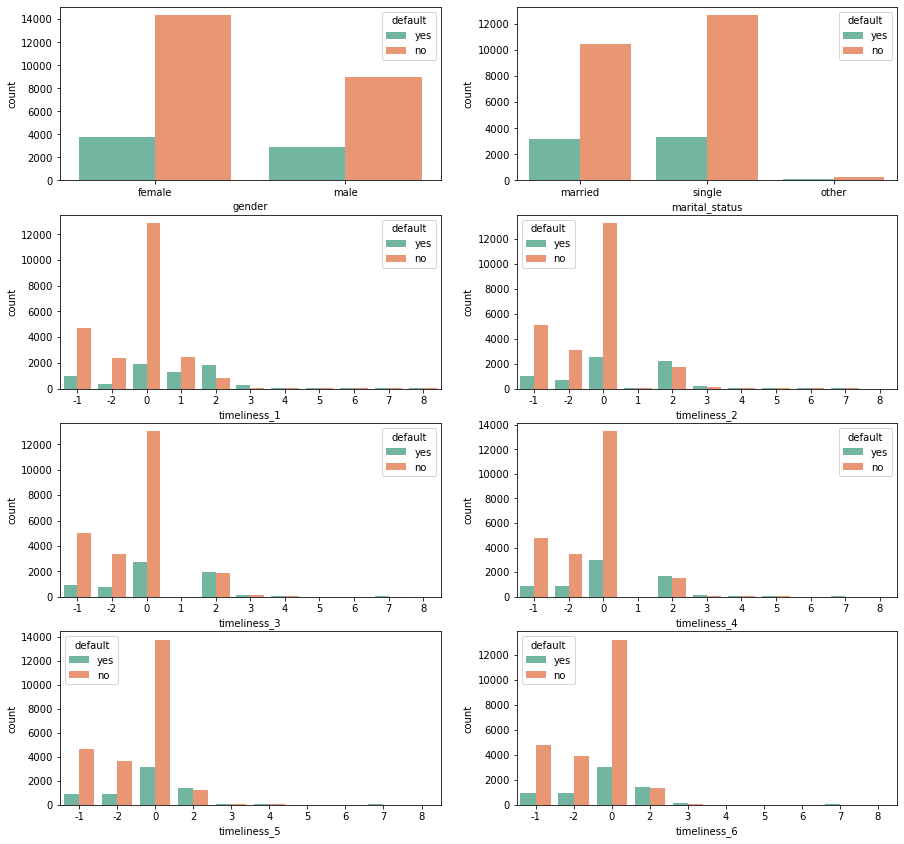

In [61]:
#countplot for categorical vriables
plt.figure(figsize=(15,30))
for i,col in enumerate(cat_cols1,1):
    if col=='default':
        break
    plt.subplot(8,2,i)
    sns.countplot(x=col, hue="default", data=df1, palette="Set2")
    plt.xlabel(col)
plt.show()

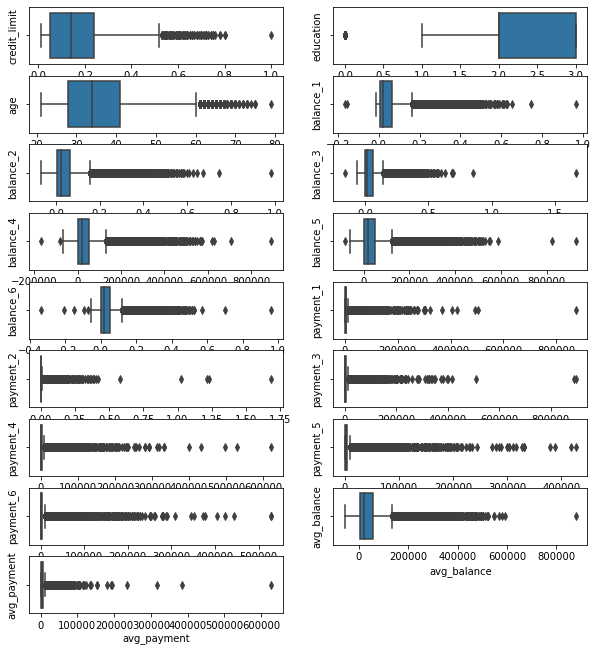

In [62]:
plt.figure(figsize=(10,20))
for i,col in enumerate(num_cols1,1):
    plt.subplot(16,2,i)
    sns.boxplot(df1[col])
    plt.ylabel(col)
plt.show()

In [63]:
# # Create a new column "HAS_DEF" to indicate customers who have at least 1 deafult payment from PAY_1 to Pay_6
# # 0 : no default ; 1: has default

# def_condition = (df.payment_1 >1) | (df.payment_2 >1) | (df.payment_3 >1) | (df.payment_4 >1) | (df.payment_5 >1) | (df.payment_6 >1)
# df.loc[def_condition, "HAS_DEF"] = 1
# df.loc[df.HAS_DEF.isna(), "HAS_DEF"] = 0

In [64]:
# Define a function to plot stacked bar chart since there will be multiple stacked bars charts to plot

def create_stacked_bar(column_name):

    # Get the percentage of default by each group
    default_by_group = pd.crosstab(index=df1['default'],columns = df1[column_name], normalize = 'columns')
    
    # Round up to 2 decimal
    default_by_group = default_by_group.apply(lambda x: round(x,2))
    
    labels = default_by_group.columns
    list1 = default_by_group.iloc[0].to_list()
    list2 = default_by_group.iloc[1].to_list()
    
    list1_name = "No default"
    list2_name = "Has default"
    title = f"Default by {column_name}"
    xlabel = column_name
    ylabel = "Default percentage"
    
    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.5
    
    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")
    
    plt.xticks(list(range(len(labels))), labels,rotation=90)
    plt.yticks(fontsize=9)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

    plt.show()

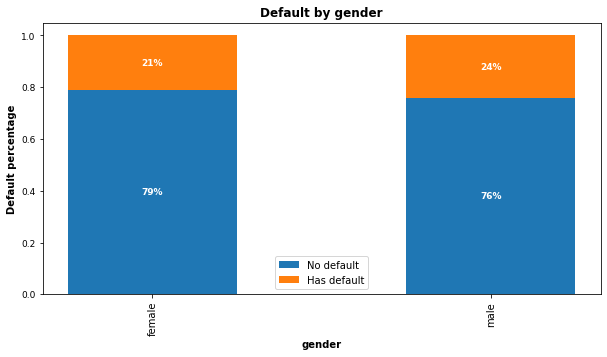

In [65]:
create_stacked_bar('gender')

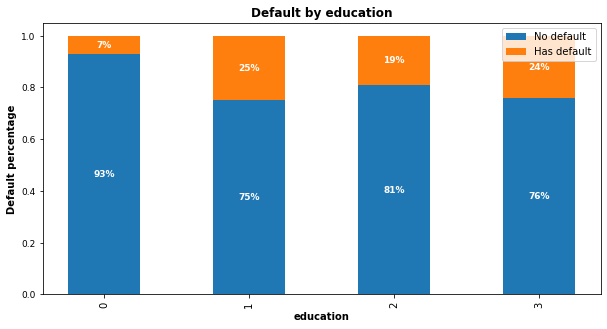

In [66]:
create_stacked_bar('education')

#The data indicates customers with lower education levels default more. Customers with high school and university educational level had higher default percentages than customers with grad school education did.

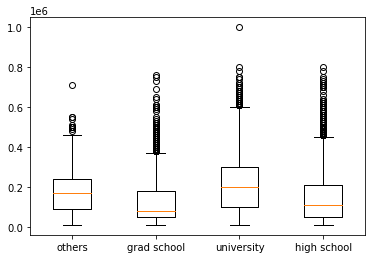

In [67]:
data = []
for i in [0,1,2,3]:
    temp = df1.loc[df1.education == i, "credit_limit"]
    data.append(temp)

fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(["others","grad school", "university", "high school"])

plt.show()

#From the boxplot, we can see that customers with grad school education have the highest 25% percentile,highest median,highest 75th percentile and highest maximum numbers, which proves that customers with higher education levels did get higher credit limits.

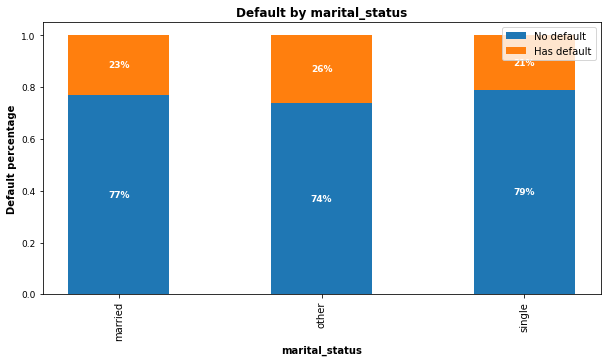

In [68]:
create_stacked_bar('marital_status')

#There is no difference of default risk in terms of marital status, although the 'other'marital status group had high default percentage.

In [69]:
# Creating bins for Age column
bins= [21,30,40,50,60,70,80]
labels = ['20-30','30-40','40-50','50-60','60-70','70-80']
df1['age'] = pd.cut(df1['age'],bins=bins, labels=labels,right=False)

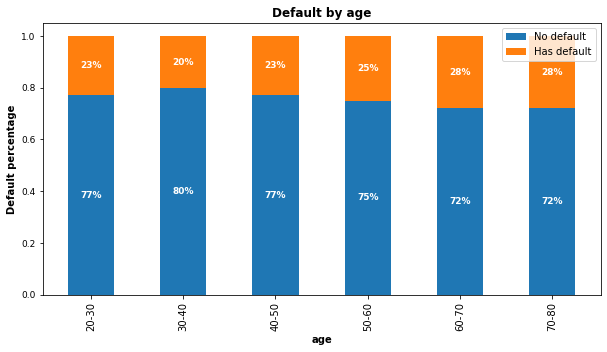

In [70]:
create_stacked_bar('age')

#Customers aged between 30-50 had the lowest delayed payment rate, while younger groups (20-30) and older groups (50-70) all had higher delayed payment rates. However, the delayed rate dropped slightly again in customers older than 70 years.

# Correlation between education and default:


We will use a Chi-squared test to verify this finding.

Null hypothesis: education does not affect default likelihood.

Alternative hypothesis: education impacts default likelihood.

Set significance level  α  to 0.05

In [71]:
edu_def_contigence = pd.crosstab(df1['default'], df1['education'], margins=False)

In [72]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(edu_def_contigence)

p

1.495064564810615e-34

Since the p value is close to 0, we will reject the null hypothesis and accept the alternative hypothesis. Because education has a strong correlation with default probability.

# Correlation between Age and default

Null hypothesis: age does not affect default likelihood.

Alternative hypothesis: age impacts default likelihood.

Set significance level  α  to 0.05

In [73]:
age_def_contigence = pd.crosstab(df1['default'], df1['age'], margins=False)

In [74]:
# Use chi-squared test to test if age affects default likelihood.

from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(age_def_contigence)

p

8.398778505133663e-09

The p value is smaller than significance level  α , we will reject the null hypothesis and accept the alternative hypothesis, which is age has impact on default probability.

# Correlation between Gender and payment default

Null hypothesis: gender has no impact on default probability.

Alternative hypothesis: gender has impact on default probability.

Set significance level  α  to 0.05

In [75]:
gender_def_contigence = pd.crosstab(df1['default'], df1['gender'], margins=False)

In [76]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(gender_def_contigence)

p

4.944678999412026e-12

The p value is smaller than significance level α , we will reject the null hypothesis and accept the alternative hypothesis, which is gender has impact on default probability.

# Correlation between Marital Staus and payment default

Null hypothesis: Marital status has no impact on default probability.

Alternative hypothesis: Marital status has impact on default probability.

Set significance level α to 0.05.

In [77]:
marital_def_contigence = pd.crosstab(df1['default'], df1['marital_status'], margins=False)

In [78]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(marital_def_contigence)

p

1.5126419390778658e-07

The p value is smaller than significance level α , we will reject the null hypothesis and accept the alternative hypothesis, which is marital status has impact on default probability.

# Correlation between Credit limit and the default payment

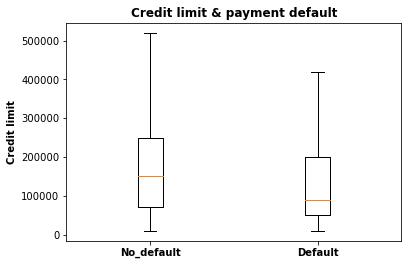

In [79]:
def0 = df1.loc[df1['default']=='no','credit_limit']
def1 = df1.loc[df1['default']=='yes','credit_limit']

fig, ax = plt.subplots()
ax.boxplot([def0, def1],showfliers=False)

ax.set_xticklabels(['No_default',"Default"],fontweight ='bold')
ax.set_ylabel('Credit limit',fontweight ='bold')
ax.set_title('Credit limit & payment default',fontweight ='bold')

plt.show()

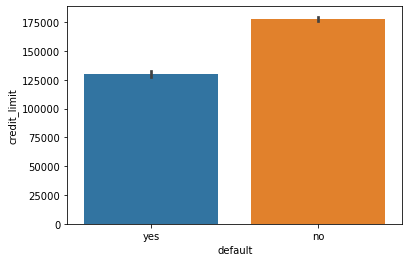

In [80]:
sns.barplot(x="default", y="credit_limit", data=df1)

Text(0.5, 0, 'Default')

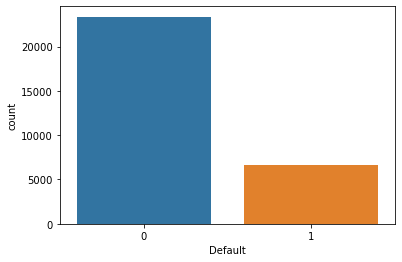

In [133]:
sns.countplot(df1['default'])
plt.xlabel('Default')

Customers with high credit limits tend to have higher 'no-default'rate.

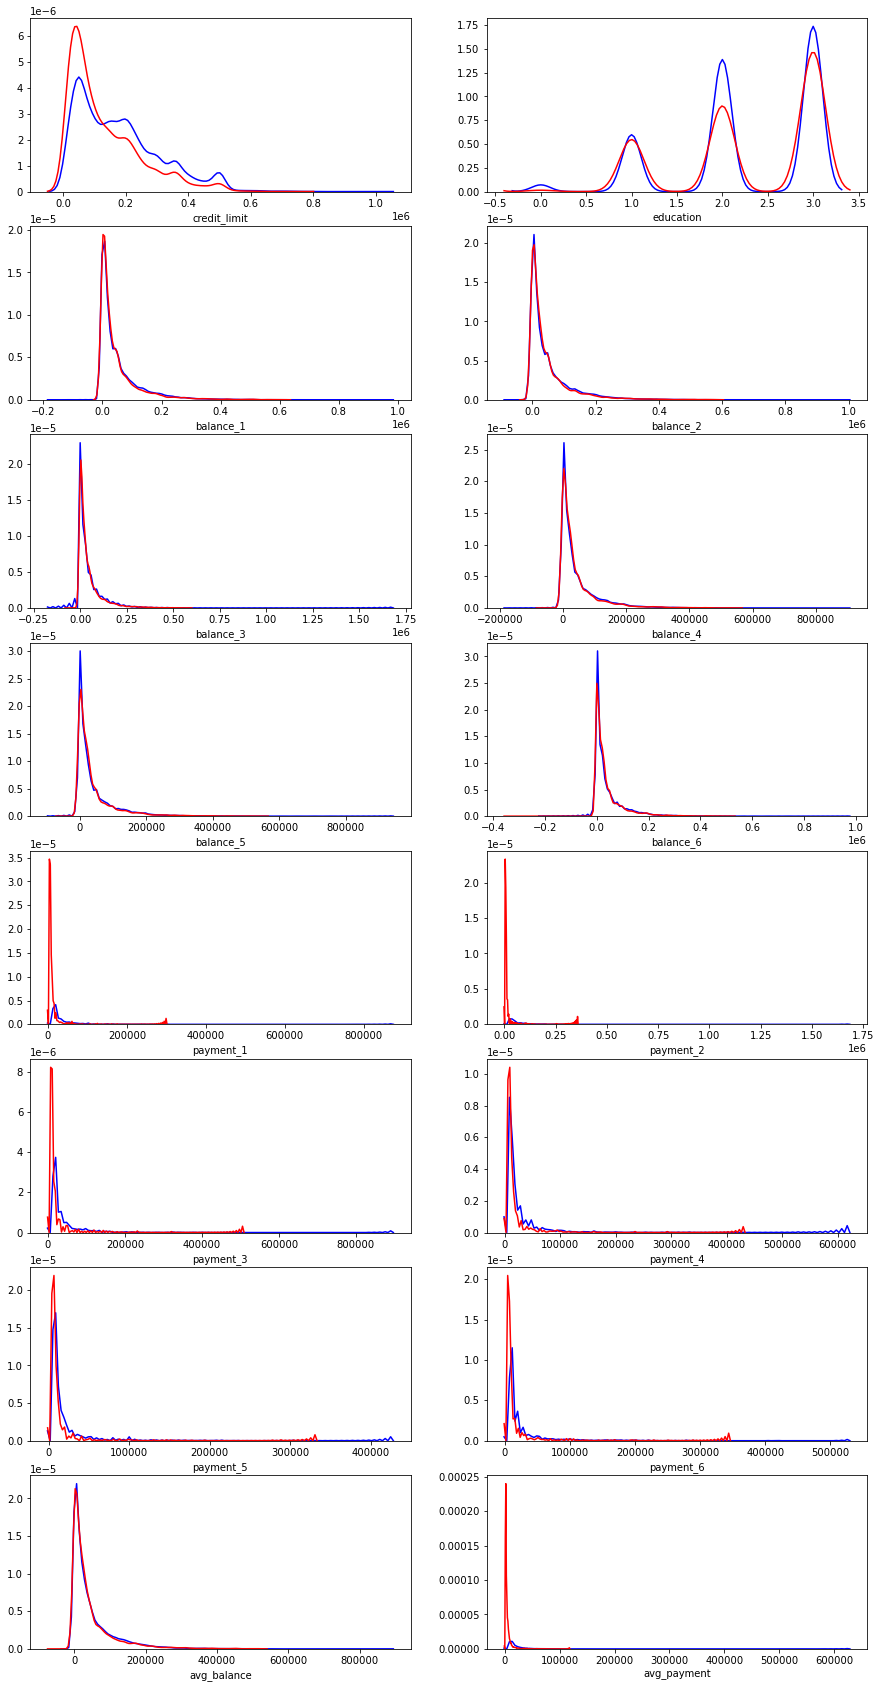

In [81]:
def_no=df1[df1['default']=='no']
def_yes=df1[df1['default']=='yes']
plt.figure(figsize=(15,30))
num_cols2=num_cols1.drop('age',axis=1)
for i,col in enumerate(num_cols2,1):
    plt.subplot(8,2,i)
    sns.distplot(def_no[col],hist=False,color='b')
    sns.distplot(def_yes[col],hist=False,color='r')
    plt.xlabel(col)
plt.show()

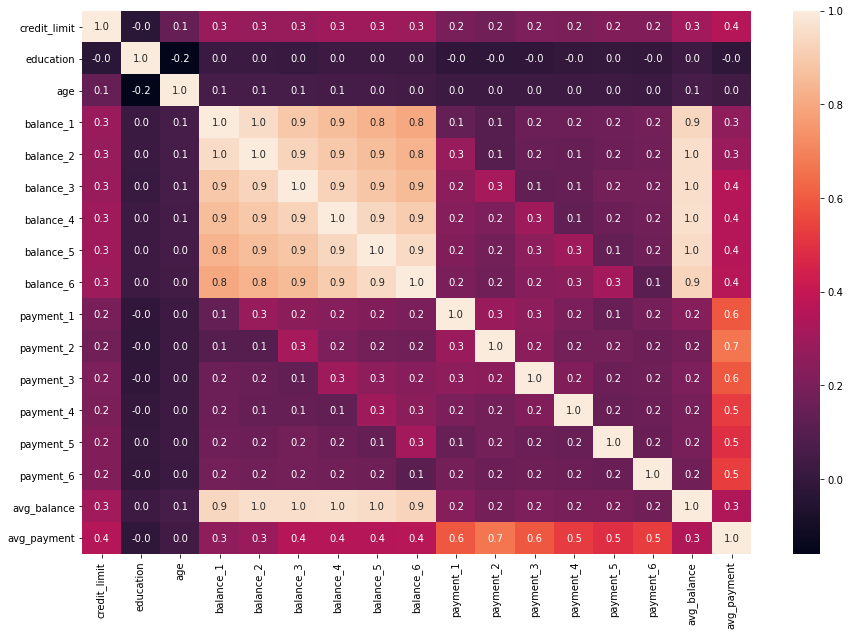

In [82]:
# Correlation matrix through heatmap
plt.figure(figsize=(15,10))
# num_def=pd.concat([num_cols1,df1['default']],axis=1)
sns.heatmap(num_cols1.corr(),annot=True,fmt=".1f")


# Outliers proportion in dataset

In [83]:
df1.shape

(30000, 26)

In [84]:
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)
IQR= Q3-Q1

In [85]:
# Outliers in the dataset
df3 = df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]
df3.shape

(10452, 26)

In [86]:
#sns.pairplot(df,hue='default',palette='husl')
#plt.show()

As the data is non linear and the data is overlapping, Logistic Regression is ruled out.

# Approach 1: Without treating outliers

In [87]:
# Creating new copy of the dataset
df4 = df1.copy(deep=True)
df4.head()

,credit_limit,gender,education,marital_status,age,timeliness_1,timeliness_2,timeliness_3,timeliness_4,timeliness_5,...,balance_6,payment_1,payment_2,payment_3,payment_4,payment_5,payment_6,avg_balance,avg_payment,default
0,20000,female,3,married,20-30,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,1284.000000,114.833333,yes
1,120000,female,3,single,20-30,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,2846.166667,833.333333,yes
2,90000,female,3,single,30-40,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,16942.166667,1836.333333,no
3,50000,female,3,married,30-40,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,38555.666667,1398.000000,no
4,50000,male,3,married,50-60,-1,0,-1,0,0,...,19131,2000,36681,10000,9000,689,679,18223.166667,9841.500000,no


In [88]:
df1['timeliness_1']=df1['timeliness_1'].astype(int) 

In [89]:
df1['timeliness_1']=df1['timeliness_1'].astype(int) 
df1['timeliness_2']=df1['timeliness_2'].astype(int) 
df1['timeliness_3']=df1['timeliness_3'].astype(int)
df1['timeliness_4']=df1['timeliness_4'].astype(int)
df1['timeliness_5']=df1['timeliness_5'].astype(int)
df1['timeliness_6']=df1['timeliness_6'].astype(int)

In [90]:
# Converting target variable into dummy
df1['default'] = pd.get_dummies(df1['default'],drop_first=True)
df1.head()

,credit_limit,gender,education,marital_status,age,timeliness_1,timeliness_2,timeliness_3,timeliness_4,timeliness_5,...,balance_6,payment_1,payment_2,payment_3,payment_4,payment_5,payment_6,avg_balance,avg_payment,default
0,20000,female,3,married,20-30,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,1284.000000,114.833333,1
1,120000,female,3,single,20-30,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,2846.166667,833.333333,1
2,90000,female,3,single,30-40,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,16942.166667,1836.333333,0
3,50000,female,3,married,30-40,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,38555.666667,1398.000000,0
4,50000,male,3,married,50-60,-1,0,-1,0,0,...,19131,2000,36681,10000,9000,689,679,18223.166667,9841.500000,0


In [91]:
from sklearn.preprocessing import LabelEncoder
labelencode = LabelEncoder()

In [92]:
df1['marital_status']= labelencode.fit_transform(df1['marital_status'])
df1['gender']=labelencode.fit_transform(df1['gender'])

In [93]:
df1['age'] = labelencode.fit_transform(df1['age'])
df1['age'].value_counts()

1    11238
0     9618
2     6464
3     2341
4      314
5       25
Name: age, dtype: int64

In [94]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   credit_limit    30000 non-null  int64  
 1   gender          30000 non-null  int32  
 2   education       30000 non-null  int32  
 3   marital_status  30000 non-null  int32  
 4   age             30000 non-null  int32  
 5   timeliness_1    30000 non-null  int32  
 6   timeliness_2    30000 non-null  int32  
 7   timeliness_3    30000 non-null  int32  
 8   timeliness_4    30000 non-null  int32  
 9   timeliness_5    30000 non-null  int32  
 10  timeliness_6    30000 non-null  int32  
 11  balance_1       30000 non-null  int64  
 12  balance_2       30000 non-null  int64  
 13  balance_3       30000 non-null  int64  
 14  balance_4       30000 non-null  int64  
 15  balance_5       30000 non-null  int64  
 16  balance_6       30000 non-null  int64  
 17  payment_1       30000 non-null 

In [95]:
x=df[['payment_1','payment_2','payment_3','payment_4','payment_5','payment_6']]

x.loc[(x.payment_1 != 0),'payment_1']= 1
x.loc[(x.payment_2 != 0),'payment_2']= 1
x.loc[(x.payment_3 != 0),'payment_3']= 1
x.loc[(x.payment_4 != 0),'payment_4']= 1
x.loc[(x.payment_5 != 0),'payment_5']= 1
x.loc[(x.payment_6 != 0),'payment_6']= 1

D:\Python\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-95-40e63eab3ba1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[(x.payment_1 != 0),'payment_1']= 1
<ipython-input-95-40e63eab3ba1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[(x.payment_2 != 0),'payment_2']= 1
<ipython-input-95-40e63eab3ba1>:5: SettingWithCop

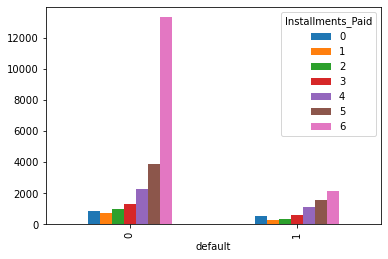

In [96]:
df1['Installments_Paid'] = x['payment_1']+x['payment_2']+x['payment_3']+x['payment_4']+x['payment_5']+x['payment_6']
pd.crosstab(index=df1['default'], columns=df1['Installments_Paid']).plot(kind='bar')

In [97]:
df1.head()

,credit_limit,gender,education,marital_status,age,timeliness_1,timeliness_2,timeliness_3,timeliness_4,timeliness_5,...,payment_1,payment_2,payment_3,payment_4,payment_5,payment_6,avg_balance,avg_payment,default,Installments_Paid
0,20000,0,3,0,0,2,2,-1,-1,-2,...,0,689,0,0,0,0,1284.000000,114.833333,1,1
1,120000,0,3,2,0,-1,2,0,0,0,...,0,1000,1000,1000,0,2000,2846.166667,833.333333,1,4
2,90000,0,3,2,1,0,0,0,0,0,...,1518,1500,1000,1000,1000,5000,16942.166667,1836.333333,0,6
3,50000,0,3,0,1,0,0,0,0,0,...,2000,2019,1200,1100,1069,1000,38555.666667,1398.000000,0,6
4,50000,1,3,0,3,-1,0,-1,0,0,...,2000,36681,10000,9000,689,679,18223.166667,9841.500000,0,6


In [98]:
# Dividing the data into independent and dependent variable
X= df1.iloc[:,:25]
X1=df1['Installments_Paid']
X= pd.concat([pd.DataFrame(X),pd.DataFrame(X1)],axis=1)
y=df1['default']
print(X.shape)
print(y.shape)

(30000, 26)
(30000,)


In [99]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_limit       30000 non-null  int64  
 1   gender             30000 non-null  int32  
 2   education          30000 non-null  int32  
 3   marital_status     30000 non-null  int32  
 4   age                30000 non-null  int32  
 5   timeliness_1       30000 non-null  int32  
 6   timeliness_2       30000 non-null  int32  
 7   timeliness_3       30000 non-null  int32  
 8   timeliness_4       30000 non-null  int32  
 9   timeliness_5       30000 non-null  int32  
 10  timeliness_6       30000 non-null  int32  
 11  balance_1          30000 non-null  int64  
 12  balance_2          30000 non-null  int64  
 13  balance_3          30000 non-null  int64  
 14  balance_4          30000 non-null  int64  
 15  balance_5          30000 non-null  int64  
 16  balance_6          300

In [100]:
!pip install imbalanced-learn

In [101]:
#Handling Imbalanced dataset:
# from imblearn import combine

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

In [102]:
# Dividing dataset into train and test
X_train, X_test,y_train,y_test= train_test_split(X,y, test_size=0.3, random_state=1)

In [103]:
# smk= SMOTETomek(random_state=1)
# X_res,y_res = smk.fit_resample(X_train,y_train).ravel()

# # Checking for the change in shape of dataset  
# from collections import Counter
# print('Original dataset shape of independent feature is {}'.format(Counter(Y)))
# print('Resample dataset shape of independent feature is {}'.format(Counter(y_res)))
# print('Original dataset shape of dependent feature is {}'.format(Counter(X)))
# print('Resample dataset shape of dependent feature is{}'.format(Counter(X_res)))

In [104]:
# Oversampling of train data
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train.ravel())

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 16359, 1: 4641})
After Counter({0: 16359, 1: 16359})


In [130]:
X_train_sm.head()

,credit_limit,gender,education,marital_status,age,timeliness_1,timeliness_2,timeliness_3,timeliness_4,timeliness_5,...,balance_6,payment_1,payment_2,payment_3,payment_4,payment_5,payment_6,avg_balance,avg_payment,Installments_Paid
0,20000,1,2,2,0,-1,-1,-1,-1,-1,...,0,390,390,780,0,0,0,325.000000,260.000000,3
1,120000,1,3,0,3,2,0,0,0,0,...,46204,4449,2731,3000,5000,3000,3000,76286.833333,3530.000000,6
2,70000,0,3,2,0,0,0,0,0,0,...,25272,3003,5106,4026,755,1029,5303,25199.000000,3203.666667,6
3,230000,1,3,2,1,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0.000000,0.000000,0
4,130000,1,3,2,3,0,0,0,0,0,...,98173,4000,5000,8000,4000,4000,5000,109036.000000,5000.000000,6


Text(0.5, 0, 'Default')

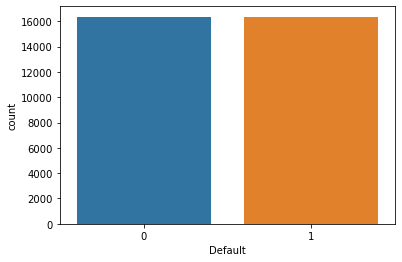

In [132]:
sns.countplot(y_train_sm)
plt.xlabel('Default')

In [105]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_curve,roc_auc_score
# import lightgbm 
# from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm

In [106]:
X_train_sm.head()

,credit_limit,gender,education,marital_status,age,timeliness_1,timeliness_2,timeliness_3,timeliness_4,timeliness_5,...,balance_6,payment_1,payment_2,payment_3,payment_4,payment_5,payment_6,avg_balance,avg_payment,Installments_Paid
0,20000,1,2,2,0,-1,-1,-1,-1,-1,...,0,390,390,780,0,0,0,325.000000,260.000000,3
1,120000,1,3,0,3,2,0,0,0,0,...,46204,4449,2731,3000,5000,3000,3000,76286.833333,3530.000000,6
2,70000,0,3,2,0,0,0,0,0,0,...,25272,3003,5106,4026,755,1029,5303,25199.000000,3203.666667,6
3,230000,1,3,2,1,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0.000000,0.000000,0
4,130000,1,3,2,3,0,0,0,0,0,...,98173,4000,5000,8000,4000,4000,5000,109036.000000,5000.000000,6


In [107]:
data=X_train_sm.drop(['gender','education','marital_status','age','timeliness_1','timeliness_2','timeliness_3','timeliness_4',
                'timeliness_5','timeliness_6','Installments_Paid'],1)

In [108]:
cat=X_train_sm[['gender','education','marital_status','age','timeliness_1','timeliness_2','timeliness_3','timeliness_4',
                'timeliness_5','timeliness_6']]

In [109]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df_scaled=ss.fit_transform(data)

In [110]:
df_scaled1=pd.DataFrame(df_scaled,columns=data.columns)

In [111]:
df_scaled1.head()

,credit_limit,balance_1,balance_2,balance_3,balance_4,balance_5,balance_6,payment_1,payment_2,payment_3,payment_4,payment_5,payment_6,avg_balance,avg_payment
0,-1.070388,-0.677901,-0.676560,-0.673363,-0.657885,-0.658389,-0.650452,-0.305989,-0.240766,-0.237997,-0.298778,-0.302094,-0.292575,-0.693140,-0.477791
1,-0.271028,0.781443,0.826184,0.866992,0.058652,0.092321,0.126627,-0.014810,-0.115607,-0.090014,0.079234,-0.076323,-0.089797,0.502915,-0.097260
2,-0.670708,-0.363596,-0.354772,-0.295691,-0.226915,-0.248471,-0.225417,-0.118541,0.011369,-0.021623,-0.241698,-0.224655,0.065869,-0.301487,-0.135235
3,0.608267,-0.683226,-0.682068,-0.679091,-0.670082,-0.658389,-0.650452,-0.333966,-0.261617,-0.289991,-0.298778,-0.302094,-0.292575,-0.698257,-0.508047
4,-0.191092,0.971181,0.868752,0.962729,1.149321,0.937812,1.000664,-0.047020,0.005702,0.243279,0.003631,-0.001066,0.045389,1.018566,0.073805


In [112]:
dat=pd.get_dummies(cat['education'],drop_first=True,prefix='education_')
X_train_mod=pd.concat([df_scaled1,dat],1)

In [113]:
X_train_mod=pd.concat([X_train_mod,cat['gender']],1)

In [114]:
dat=pd.get_dummies(cat['marital_status'],drop_first=True,prefix='marital_status_')
X_train_mod=pd.concat([X_train_mod,dat],1)

In [115]:
dat=pd.get_dummies(cat['age'],drop_first=True,prefix='age_')
X_train_mod=pd.concat([X_train_mod,dat],1)

In [116]:
dat=pd.get_dummies(cat['timeliness_1'],drop_first=True,prefix='timeliness_1_')
X_train_mod=pd.concat([X_train_mod,dat],1)

In [117]:
dat=pd.get_dummies(cat['timeliness_2'],drop_first=True,prefix='timeliness_2_')
X_train_mod=pd.concat([X_train_mod,dat],1)

In [118]:
dat=pd.get_dummies(cat['timeliness_3'],drop_first=True,prefix='timeliness_3_')
X_train_mod=pd.concat([X_train_mod,dat],1)

In [119]:
dat=pd.get_dummies(cat['timeliness_4'],drop_first=True,prefix='timeliness_4_')
X_train_mod=pd.concat([X_train_mod,dat],1)

In [120]:
dat=pd.get_dummies(cat['timeliness_5'],drop_first=True,prefix='timeliness_5_')
X_train_mod=pd.concat([X_train_mod,dat],1)

In [121]:
dat=pd.get_dummies(cat['timeliness_6'],drop_first=True,prefix='timeliness_6_')
X_train_mod=pd.concat([X_train_mod,dat],1)

In [122]:
cat['marital_status'].value_counts()

0    15304
2    14286
1     3128
Name: marital_status, dtype: int64

In [123]:
X_train_mod.head()

,credit_limit,balance_1,balance_2,balance_3,balance_4,balance_5,balance_6,payment_1,payment_2,payment_3,...,timeliness_6__-1,timeliness_6__0,timeliness_6__1,timeliness_6__2,timeliness_6__3,timeliness_6__4,timeliness_6__5,timeliness_6__6,timeliness_6__7,timeliness_6__8
0,-1.070388,-0.677901,-0.676560,-0.673363,-0.657885,-0.658389,-0.650452,-0.305989,-0.240766,-0.237997,...,0,0,0,0,0,0,0,0,0,0
1,-0.271028,0.781443,0.826184,0.866992,0.058652,0.092321,0.126627,-0.014810,-0.115607,-0.090014,...,0,1,0,0,0,0,0,0,0,0
2,-0.670708,-0.363596,-0.354772,-0.295691,-0.226915,-0.248471,-0.225417,-0.118541,0.011369,-0.021623,...,0,1,0,0,0,0,0,0,0,0
3,0.608267,-0.683226,-0.682068,-0.679091,-0.670082,-0.658389,-0.650452,-0.333966,-0.261617,-0.289991,...,0,0,0,0,0,0,0,0,0,0
4,-0.191092,0.971181,0.868752,0.962729,1.149321,0.937812,1.000664,-0.047020,0.005702,0.243279,...,0,1,0,0,0,0,0,0,0,0


In [124]:
X_train_mod=pd.concat([X_train_mod,X_train_sm['Installments_Paid']],1)

In [125]:
X_train_mod=X_train_mod.drop('Installments_Paid',1)

In [126]:
X_train_log, X_test_log,y_train_log,y_test_log= train_test_split(X_train_mod,y_train_sm, test_size=0.3, random_state=1)

# Building base models 


In [127]:
#Base model:
#1) Logistic regression:

X_log=X_train_sm
y_log=y_train_sm
x_log=sm.add_constant(X_log)
X_train_log, X_test_log,y_train_log,y_test_log= train_test_split(X_log,y_log, test_size=0.3, random_state=1)

In [ ]:
logreg = sm.Logit(y_train_log, X_train_log).fit()
print(logreg.summary())

In [164]:
from sklearn.linear_model import LogisticRegression

In [165]:
clf = LogisticRegression(random_state=0).fit(X_train_sm, y_train_sm)
y_pred=clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [167]:
print('Classificaltion report \n',classification_report(y_test_log,y_pred))

Classificaltion report 
               precision    recall  f1-score   support

           0       0.82      0.89      0.86      4980
           1       0.88      0.80      0.84      4836

    accuracy                           0.85      9816
   macro avg       0.85      0.85      0.85      9816
weighted avg       0.85      0.85      0.85      9816



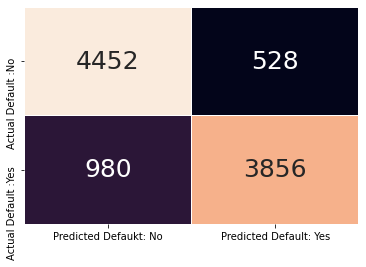

In [170]:
cm = confusion_matrix(y_test_log,y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted Defaukt: No','Predicted Default: Yes'], 
                           index = ['Actual Default :No','Actual Default :Yes'])
sns.heatmap(conf_matrix, annot=True, annot_kws = {'size':25}, fmt = 'd',linewidths = 0.3, cbar = False)

In [ ]:
#Logistic Regression 

In [172]:
#Random forest:
rf= RandomForestClassifier(random_state=1)
rf.fit(X_train_sm,y_train_sm)


y_pred_rf = rf.predict(X_test)

print('Classificaltion report \n',classification_report(y_test,y_pred_rf))

Classificaltion report 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      7005
           1       0.55      0.44      0.49      1995

    accuracy                           0.80      9000
   macro avg       0.70      0.67      0.68      9000
weighted avg       0.78      0.80      0.79      9000



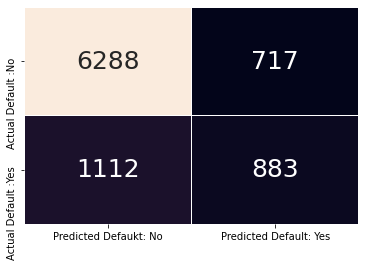

In [174]:
# CONFUSION MATRIX

cm = confusion_matrix(y_test, y_pred_rf)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted Defaukt: No','Predicted Default: Yes'], 
                           index = ['Actual Default :No','Actual Default :Yes'])
sns.heatmap(conf_matrix, annot=True, annot_kws = {'size':25}, fmt = 'd',linewidths = 0.3, cbar = False)

In [176]:
#tuning parameter for Random forest:
param_grid = {
    'max_depth': [60, 90, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200]
}

In [177]:
rf_tuned = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf_tuned, param_grid = param_grid,    
                          cv = 3, n_jobs = -1)

In [178]:
grid_search.fit(X_train_log, y_train_log)
grid_search.best_params_

{'max_depth': 110,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [180]:
#Random forest with tuned parameter:
rf1= RandomForestClassifier(**grid_search.best_params_)
rf1.fit(X_train_sm,y_train_sm)


y_pred_rf1= rf1.predict(X_test_log)

print('Classificaltion report \n',classification_report(y_test_log,y_pred_rf1))

Classificaltion report 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      4980
           1       0.97      0.94      0.96      4836

    accuracy                           0.96      9816
   macro avg       0.96      0.96      0.96      9816
weighted avg       0.96      0.96      0.96      9816



In [ ]:
scores_best = cross_val_score(rf1, X_train_sm, y_train_sm, scoring ="accuracy", cv = 5)
accuracy_best = np.mean(scores_best)

print(f'Accuracy score after tuning for Random Forest: {accuracy_best}')

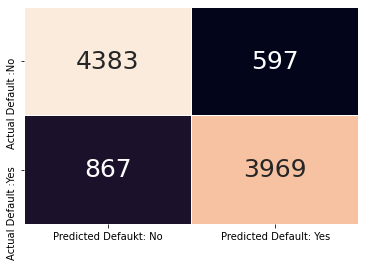

In [143]:
# CONFUSION MATRIX

cm = confusion_matrix(y_test_log, y_pred_rf1)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted Defaukt: No','Predicted Default: Yes'], 
                           index = ['Actual Default :No','Actual Default :Yes'])
sns.heatmap(conf_matrix, annot=True, annot_kws = {'size':25}, fmt = 'd',linewidths = 0.3, cbar = False)

In [ ]:
from sklearn.feature_selection import RFE


In [ ]:
# linreg_rfe=RandomForestClassifier(random_state=1)
# rfe_model=RFE(estimator=linreg_rfe,n_features_to_select=5)
# rfe_model=rfe_model.fit(X_train_log,y_train_log)
# feat_index=pd.Series(data=rfe_model.ranking_,index=X_train_log.columns)
# signi_feat_rfe=feat_index[feat_index==1].index
# print(signi_feat_rfe)

In [ ]:
#Random forest:
rf= RandomForestClassifier(random_state=1)
rf.fit(X_train_log,y_train_log)


y_pred_rf = rf.predict(X_test_log)

print('Classificaltion report \n',classification_report(y_test_log,y_pred_rf))

In [ ]:
# CONFUSION MATRIX

cm = confusion_matrix(y_test_log, y_pred_rf)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted Defaukt: No','Predicted Default: Yes'], 
                           index = ['Actual Default :No','Actual Default :Yes'])
sns.heatmap(conf_matrix, annot=True, annot_kws = {'size':25}, fmt = 'd',linewidths = 0.3, cbar = False)

In [147]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test_log, y_pred_rf)
acc = accuracy_score(y_test_log, y_pred_rf)
prec = precision_score(y_test_log, y_pred_rf)
rec = recall_score(y_test_log, y_pred_rf)
f1 = f1_score(y_test_log, y_pred_rf)

model_results =  pd.DataFrame([['Random Forest', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.860636,0.876957,0.83416,0.855023,0.860253


In [148]:
##XGBOOST:

xgb= XGBClassifier(random_state=10)
xgb.fit(X_train_log,y_train_log)
y_pred = xgb.predict(X_test_log)
print('Classificaltion report',classification_report(y_test_log,y_pred))

D:\Python\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:38:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classificaltion report               precision    recall  f1-score   support

           0       0.82      0.89      0.86      4980
           1       0.88      0.80      0.84      4836

    accuracy                           0.85      9816
   macro avg       0.85      0.85      0.85      9816
weighted avg       0.85      0.85      0.85      9816



D:\Python\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [150]:
# Number of trees
n_estimators = np.arange(200,1000,200)

# Minimum loss reduction required to make a further partition on a leaf node of the tree
# The larger gamma is, the more conservative the algorithm will be
gamma = np.arange(0.1,0.6,0.1)

# Default 0.3, range(0,1)
learning_rate = np.arange(0.1,0.6,0.1)

# Maximum number of levels in tree
max_depth = list(range(3,8,1))

# Subsample ratio of the training instances.Range(0,1)
subsample = np.arange(0.5,0.9,0.1)

# Subsample ratio of columns when constructing each tree. Range(0,1)
colsample_bytree = np.arange(0.5,0.9,0.1)

# Control the balance of positive and negative weights
# Sum(negative instances) / sum(positive instances)
scale_pos_weight = [1,3.5]


# Create the random grid
grid_xgb = {'n_estimators': n_estimators,
                   'gamma': gamma,
                   'learning_rate':learning_rate,
                   'max_depth': max_depth,
                   'subsample':subsample,
                   'colsample_bytree':colsample_bytree,
                   'scale_pos_weight':scale_pos_weight
                  }
print(grid_xgb)

{'n_estimators': array([200, 400, 600, 800]), 'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5]), 'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5]), 'max_depth': [3, 4, 5, 6, 7], 'subsample': array([0.5, 0.6, 0.7, 0.8]), 'colsample_bytree': array([0.5, 0.6, 0.7, 0.8]), 'scale_pos_weight': [1, 3.5]}


In [ ]:
xgboost = XGBClassifier()
xgb_grid = GridSearchCV(estimator = xgboost, 
                                param_grid = grid_xgb,  
                                cv = 3, 
                                verbose=1,  
                                n_jobs = -1,
                                scoring ='accuracy')


xgb_grid.fit(X_train_log, y_train_log)   
xgb_grid.best_params_, xgb_grid.best_score_

print(xgb_grid.best_params_,xgb_grid.best_score_)

In [153]:
xgb1= XGBClassifier()
xgb1.fit(X_train_log,y_train_log)
y_pred = xgb1.predict(X_test_log)
print('Classificaltion report',classification_report(y_test_log,y_pred))

D:\Python\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:00:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classificaltion report               precision    recall  f1-score   support

           0       0.82      0.89      0.86      4980
           1       0.88      0.80      0.84      4836

    accuracy                           0.85      9816
   macro avg       0.85      0.85      0.85      9816
weighted avg       0.85      0.85      0.85      9816



D:\Python\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [154]:

roc=roc_auc_score(y_test_log, y_pred)
acc = accuracy_score(y_test_log, y_pred)
prec = precision_score(y_test_log, y_pred)
rec = recall_score(y_test_log, y_pred)
f1 = f1_score(y_test_log, y_pred)
model =  pd.DataFrame([['XGBoost', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.860636,0.876957,0.834160,0.855023,0.860253
1,XGBoost,0.846373,0.879562,0.797353,0.836443,0.845665


In [155]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10,p=2,metric='minkowski')
model.fit(X_train_log,y_train_log)

y_pred_test = model.predict(X_test_log)
print(classification_report(y_test_log,y_pred_test))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69      4980
           1       0.68      0.78      0.73      4836

    accuracy                           0.71      9816
   macro avg       0.72      0.71      0.71      9816
weighted avg       0.72      0.71      0.71      9816



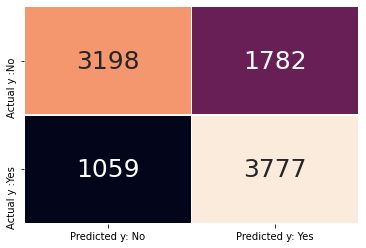

In [156]:
# type your code here

cm = confusion_matrix(y_test_log, y_pred_test)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted y: No','Predicted y: Yes'], 
                           index = ['Actual y :No','Actual y :Yes'])

sns.heatmap(conf_matrix, annot=True, annot_kws = {'size':25}, fmt = 'd',linewidths = 0.3, cbar = False)

In [157]:

roc=roc_auc_score(y_test_log, y_pred_test)
acc = accuracy_score(y_test_log, y_pred_test)
prec = precision_score(y_test_log, y_pred_test)
rec = recall_score(y_test_log, y_pred_test)
f1 = f1_score(y_test_log, y_pred_test)
model =  pd.DataFrame([['KNN', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.860636,0.876957,0.834160,0.855023,0.860253
1,XGBoost,0.846373,0.879562,0.797353,0.836443,0.845665
2,KNN,0.710575,0.679439,0.781017,0.726696,0.711593


In [158]:
##STACKING:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from warnings import filterwarnings
filterwarnings('ignore')

In [159]:
model_1=RandomForestClassifier(random_state=1)
model_2=XGBClassifier(random_state=10)
model_3=KNeighborsClassifier(n_neighbors=10,p=2,metric='minkowski')
last=LogisticRegression()

In [160]:
stack=StackingClassifier(classifiers=[model_1,model_2,model_3],meta_classifier=last)

In [161]:
for classifier, label in zip([model_1,model_2,model_3,stack],['RF','XGBOOST','KNN','STACKING CLASSIFIER']):
    scores=cross_val_score(classifier,X_train_log,y_train_log,cv=5,scoring='accuracy')
    print(f"Accuracy: {scores.mean()} std : {scores.std()} classifier: {label}")

Accuracy: 0.8563883479227377 std : 0.00310747448563381 classifier: RF
[18:01:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:01:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:01:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
